In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

# For time stamps
from datetime import datetime

In [75]:
df = pd.read_csv(r'/kaggle/input/dffder/train_dataframe.csv')
threshold = 0.5  # 50%

# Расчет доли NaN значений по столбцам
nan_ratio = df.isna().mean()

# Фильтрация столбцов, где доля NaN значений превышает пороговое значение
filtered_columns = nan_ratio[nan_ratio <= threshold].index

# Удаление столбцов с более чем 50% NaN значений
df_filtered = df[filtered_columns]

df_filtered.head()

,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т",Ключевая ставка
0,2015-01-05,32900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-12,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-19,32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-26,30700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-02,30300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_filtered.fillna(0, inplace=True)
df_filtered.head()

/tmp/ipykernel_29/2196080083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(0, inplace=True)


,dt,Цена на арматуру,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Чугун_CFR Италия, $/т","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС",...,"Концентрат коксующегося угля_Россия марка ГЖ FCA руб./т, без НДС","Чугун_CFR NOLA США, $/т","Чугун_CFR Турция, $/т","ЖРС_Средневзвешенная цена окатыши Fe 62-65,5%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена концентрат Fe 64-68%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена аглоруда Fe 52-60%, Россия FCA руб./т, без НДС","ЖРС_Средневзвешенная цена за 1 % Fe в аглоруде, Россия FCA руб./т, без НДС","ЖРС_Украинский концентрат Fe 65-68%, DAP граница Украины с Европой, $/т","ЖРС_Украинские окатыши Fe 65-66%, DAP граница Украины с Европой, $/т",Ключевая ставка
0,2015-01-05,32900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-12,32500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-19,32000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-26,30700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-02-02,30300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df.filter(['Цена на арматуру'])

,Цена на арматуру
0,32900
1,32500
2,32000
3,30700
4,30300
...,...
395,47500
396,49000
397,47500
398,46500


In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Создание объекта StandardScaler
scaler = StandardScaler()
# df_filtered.set_index('dt', inplace=True)
df_filtered = df.filter(['Цена на арматуру']).values
# Масштабирование признаков
# df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered), columns=df_filtered.columns)
df_scaled = pd.DataFrame(scaler.fit_transform(df_filtered))

df_scaled.head()

,0
0,-0.472659
1,-0.502529
2,-0.539867
3,-0.636946
4,-0.666816


In [79]:
# Create a new dataframe with only the 'Close column 
# data = df.filter(['Цена на арматуру'])
# Convert the dataframe to a numpy array
# data = df_scaled.drop(columns=['dt'])
dataset = df_scaled.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * 1.0 ))

training_data_len

400

In [94]:
# Create the training data set 
# Create the scaled training data set
train_data = dataset[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(10, len(train_data)):
    x_train.append(train_data[i-10:i])
    y_train.append(train_data[i, 0])

        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.nan_to_num(x_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*dataset.shape[1], 1))

x_train.shape

(390, 10, 1)

In [86]:
y_train[0]

-0.7340244521209397

In [95]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [119]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
390/390 [==============================] - 7s 7ms/step - loss: 0.2148
Epoch 2/10
390/390 [==============================] - 3s 8ms/step - loss: 0.0709
Epoch 3/10
390/390 [==============================] - 3s 9ms/step - loss: 0.0443
Epoch 4/10
390/390 [==============================] - 3s 7ms/step - loss: 0.0243
Epoch 5/10
390/390 [==============================] - 3s 7ms/step - loss: 0.0183
Epoch 6/10
390/390 [==============================] - 3s 7ms/step - loss: 0.0192
Epoch 7/10
390/390 [==============================] - 3s 9ms/step - loss: 0.0162
Epoch 8/10
390/390 [==============================] - 3s 7ms/step - loss: 0.0184
Epoch 9/10
390/390 [==============================] - 3s 7ms/step - loss: 0.0177
Epoch 10/10
390/390 [==============================] - 3s 7ms/step - loss: 0.0200


In [89]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = dataset[training_data_len - 14: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(14, len(test_data)):
    x_test.append(test_data[i-14:i])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*dataset.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
padded_data = np.pad(predictions, [(0, 0), (0, 42 - predictions.shape[1])], mode='constant')

predictions = scaler.inverse_transform(padded_data)
print(predictions[0][0])


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)
predictions = [pred[0] for pred in predictions]
print(predictions)

IndexError: tuple index out of range

In [122]:
y_train[-1]

0.5055947447545395

In [153]:
input_data = x_train[-1]
input_data[1:]

array([[0.35624303],
       [0.43091889],
       [0.46825682],
       [0.5802706 ],
       [0.61760853],
       [0.61760853],
       [0.72962231],
       [0.61760853],
       [0.54293267]])

In [140]:
model.predict(input_data)

TypeError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/layers/rnn/lstm.py", line 615, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_12' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_12' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [167]:
predictions = []

input_data = x_train[-1]

for _ in range(28):
    # Выполнение предсказания
    prediction = list(model.predict(input_data))[0][0]
    input_data = np.concatenate((input_data[1:], [[prediction]]), axis=0)
    
    # Обратное масштабирование предсказания
    prediction = scaler.inverse_transform([[prediction]])
    predictions.append(int(prediction[0][0]))

# Вывод предсказаний
print(predictions)

1/1 [==============================] - 0s 26ms/step
[44730, 46216, 47710, 48458, 50709, 51460, 51460, 53710, 51460, 49958, 47306, 49533, 51775, 52898, 56263, 57378, 57378, 60688, 57378, 55144, 51169, 54508, 57845, 59501, 64365, 65939, 65939, 70475]


In [171]:
test = pd.read_excel('/kaggle/input/dffder/test.xlsx')

test['Цена на арматуру'] = pd.Series(data=predictions)

In [172]:
test.head()

,dt,Цена на арматуру
0,2022-09-05,44730
1,2022-09-12,46216
2,2022-09-19,47710
3,2022-09-26,48458
4,2022-10-03,50709


In [115]:
input_data = x_train[-1]
prediction = model.predict(input_data)
# input_data = np.append(input_data[1:], prediction)

TypeError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/layers/rnn/lstm.py", line 615, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_8' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_8' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [109]:
np.append(input_data[1:], 1)

array([0.35624303, 0.43091889, 0.46825682, 0.5802706 , 0.61760853,
       0.61760853, 0.72962231, 0.61760853, 0.54293267, 1.        ])

In [101]:
predictions = model.predict(x_train[-1:])

predictions = scaler.inverse_transform(predictions)
predictions


1/1 [==============================] - 0s 21ms/step


array([[47316.477]], dtype=float32)

In [102]:
x_train[-1]


array([[0.28156718],
       [0.35624303],
       [0.43091889],
       [0.46825682],
       [0.5802706 ],
       [0.61760853],
       [0.61760853],
       [0.72962231],
       [0.61760853],
       [0.54293267]])

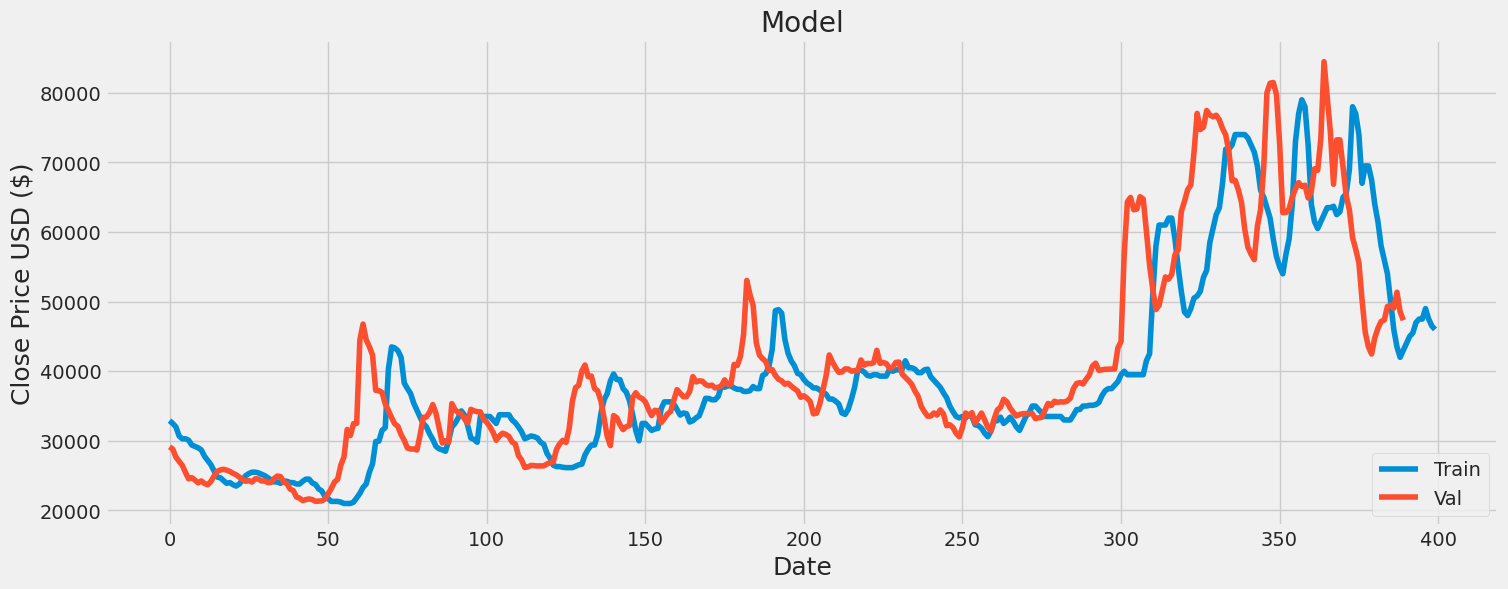

In [99]:
# Plot the data
# train = data[:training_data_len]
# valid = data[training_data_len:]
# valid['Predictions'] = predictions
# # Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Цена на арматуру'])
plt.plot(predictions)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
# Show the valid and predicted prices
valid

,Цена на арматуру,Predictions
380,64000,67701.835938
381,61500,66686.890625
382,58000,65305.285156
383,56000,63523.691406
384,54000,61566.167969
385,50000,59551.449219
386,46000,57297.929688
387,43500,54755.722656
388,42000,52114.203125
389,43000,49586.843750


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)